# Пример стандартной регрессионной нейронной сети на основе TensorFlow

## Импортируем всё необходимое

In [1]:
# Джентльменский набор (за исключением pandas, здесь он нам не пригодится)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Из tensorflow.keras импортируем датасет с данными о стоимости домов Бостона 1970 года,
# где фичи - свойства самого дома (частота преступлений в районе, концентрация вредных веществ в воздухе и т.д.),
# а целевая переменная - стоимость дома
from tensorflow.keras.datasets import boston_housing

# Также импортируем простую модель многослойного персептрона Sequential и тип слоя нейронной сети Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Подготавливаем данные

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data() # Загружаем данные

### Нормировка данных

In [3]:
# Нормируем значения входных данных
def norm(x):
    mean = x.mean(axis=0) # Вычисляем среднее по строкам
    std = x.std(axis=0) # Вычисляем СКО по строкам
    return (x - mean) / std # Возвращаем отнормированный вектор данных

x_train = norm(x_train);
x_test = norm(x_test);

In [4]:
# Приводим значения выходных данных в диапазон от 0 до 1
min_y = y_train.min() # Вычисляем минимальное значение y_train
max_y = y_train.max() - min_y # "Опустим" максимум на min_y

# Отклонение от минимума к амплитуде
y_train = (y_train - min_y) / max_y
y_test = (y_test - min_y) / max_y

## Создаём модель

In [54]:
model = Sequential() # Делаем переменную model объектом класса Sequential (объект класса нейронных сетей)

# Добавляем к нашей модели слои с заданными размерами, функциями активаций
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid, т.к. данные мы отнормировали выходные данные от 0 до 1

print(model.summary()) # Выводим архитектуру нашей модели

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Архитектура готова, теперь финальный штрих - правила оценки ошибки!

In [56]:
# Т.к. задача регрессии, удобнее использовать mean square error(средне-квадратичная ошибка).
# В качестве метрики берем mean absolute error (средний модуль ошибки)
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## Тренируем модель

In [57]:
# Фитим тренировочные данные, задаём количество эпох и деление тренировочных данных для каждой эпохи
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    validation_split=0.1,
                    verbose=2)

Epoch 1/100
12/12 - 1s - loss: 0.0251 - mae: 0.1167 - val_loss: 0.0075 - val_mae: 0.0730 - 517ms/epoch - 43ms/step
Epoch 2/100
12/12 - 0s - loss: 0.0123 - mae: 0.0751 - val_loss: 0.0051 - val_mae: 0.0575 - 39ms/epoch - 3ms/step
Epoch 3/100
12/12 - 0s - loss: 0.0095 - mae: 0.0654 - val_loss: 0.0062 - val_mae: 0.0647 - 41ms/epoch - 3ms/step
Epoch 4/100
12/12 - 0s - loss: 0.0082 - mae: 0.0606 - val_loss: 0.0050 - val_mae: 0.0551 - 37ms/epoch - 3ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0073 - mae: 0.0575 - val_loss: 0.0050 - val_mae: 0.0543 - 38ms/epoch - 3ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0067 - mae: 0.0558 - val_loss: 0.0049 - val_mae: 0.0557 - 40ms/epoch - 3ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0062 - mae: 0.0530 - val_loss: 0.0052 - val_mae: 0.0572 - 37ms/epoch - 3ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0058 - mae: 0.0524 - val_loss: 0.0057 - val_mae: 0.0630 - 38ms/epoch - 3ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0053 - mae: 0.0509 - val_loss: 0.0048 - val_mae: 0.0598 - 39m

Epoch 73/100
12/12 - 0s - loss: 0.0017 - mae: 0.0297 - val_loss: 0.0026 - val_mae: 0.0410 - 37ms/epoch - 3ms/step
Epoch 74/100
12/12 - 0s - loss: 0.0016 - mae: 0.0289 - val_loss: 0.0028 - val_mae: 0.0410 - 34ms/epoch - 3ms/step
Epoch 75/100
12/12 - 0s - loss: 0.0015 - mae: 0.0280 - val_loss: 0.0026 - val_mae: 0.0389 - 39ms/epoch - 3ms/step
Epoch 76/100
12/12 - 0s - loss: 0.0015 - mae: 0.0282 - val_loss: 0.0040 - val_mae: 0.0505 - 39ms/epoch - 3ms/step
Epoch 77/100
12/12 - 0s - loss: 0.0016 - mae: 0.0288 - val_loss: 0.0029 - val_mae: 0.0429 - 36ms/epoch - 3ms/step
Epoch 78/100
12/12 - 0s - loss: 0.0015 - mae: 0.0284 - val_loss: 0.0028 - val_mae: 0.0425 - 35ms/epoch - 3ms/step
Epoch 79/100
12/12 - 0s - loss: 0.0015 - mae: 0.0280 - val_loss: 0.0025 - val_mae: 0.0406 - 38ms/epoch - 3ms/step
Epoch 80/100
12/12 - 0s - loss: 0.0015 - mae: 0.0280 - val_loss: 0.0030 - val_mae: 0.0434 - 38ms/epoch - 3ms/step
Epoch 81/100
12/12 - 0s - loss: 0.0016 - mae: 0.0287 - val_loss: 0.0028 - val_mae: 0.042

## Предсказываем значения и оцениваем ошибку

In [58]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model.predict(x_test).flatten()

# Возвращаем прогноз к прежнему размеру
pred = pred * max_y + min_y
y_test = y_test * max_y + min_y

4/4 [==============================] - 0s 1ms/step


In [59]:
# Средний модуль отклонения 
err = np.mean(abs(pred - y_test))
print(err)

2.9490862173192642


In [60]:
# Средняя цена по выборке
print(np.mean(y_test))

23.07843137254902


In [63]:
# Предсказание vs правильный ответ
for i in range(5):
    print("Сеть сказала: ", round(pred[i],2), ", а верный ответ: ",
        round(y_test[i],2), ", разница: ", round(pred[i] - y_test[i],2))

Сеть сказала:  7.23 , а верный ответ:  7.2 , разница:  0.03
Сеть сказала:  16.92 , а верный ответ:  18.8 , разница:  -1.88
Сеть сказала:  20.94 , а верный ответ:  19.0 , разница:  1.94
Сеть сказала:  40.0 , а верный ответ:  27.0 , разница:  13.0
Сеть сказала:  23.69 , а верный ответ:  22.2 , разница:  1.49


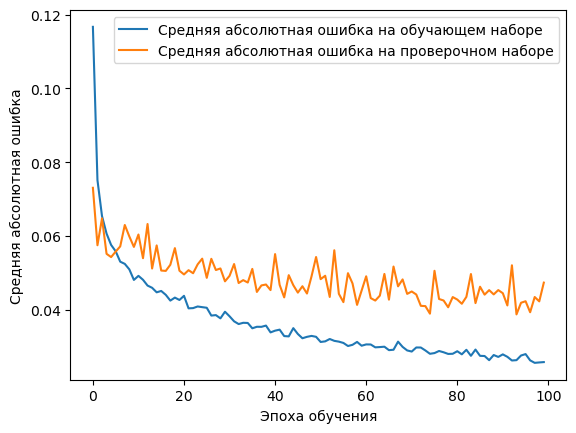

In [64]:
# Считаем графики ошибки
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

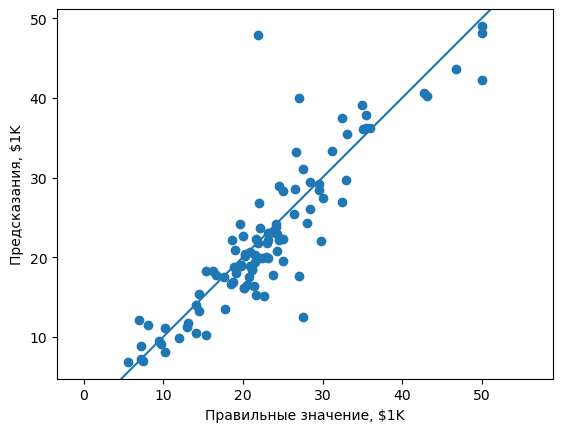

In [65]:
# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_test, pred) 
plt.xlabel('Правильные значение, $1K')
plt.ylabel('Предсказания, $1K')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

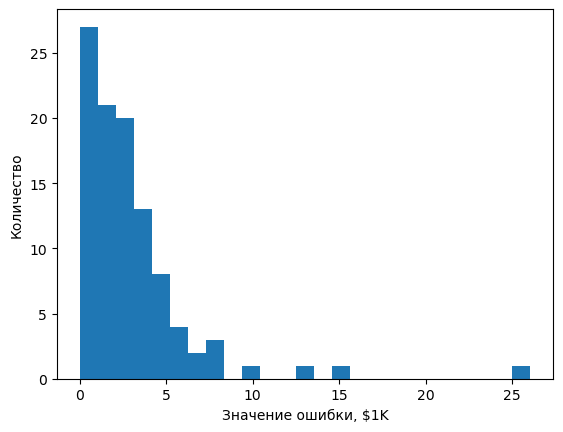

In [67]:
# Разность предсказанного и правильного ответа
error = pred - y_test
# Строим гистограмму
plt.hist(abs(error), bins = 25)
plt.xlabel("Значение ошибки, $1K")
plt.ylabel("Количество")
plt.show()